<a href="https://colab.research.google.com/github/k-washi/notebook/blob/master/explain/learning_cat_and_dog_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 参考文献
[1] [機械学習モデルの判断根拠の説明](https://www.slideshare.net/SatoshiHara3/ver2-225753735)  
[2] [機械学習の説明可能性](https://tjo.hatenablog.com/entry/2019/12/19/190000)

# [Score-CAM: Score-Weighted Visual Explanations for Convolutional Neural Networks](https://arxiv.org/pdf/1910.01279.pdf)

Score-CAMは、Grad-CAMおよびGrad-CAM ++よりもノイズの少ない優れた視覚的パフォーマンスを実現し、安定性が高いことを示しています。



## 解釈可能性

ニューラルネットワークの予測に対する人々の信頼を築くために重要。画像分類に絞り込むと、通常は顕著性マップと呼ばれる一般的な視覚的説明アプローチは、モデルによる予測のターゲットクラススコアに最も影響力のある画像の領域を見つけることです。



#### 解釈可能性の手法

+ 勾配ベース

  出力から入力を逆にたどれば何か意味がある結果が得られるのではないかというもの。

  Guided Backpropagation が有名だが、勾配を見ているだけでモデルを考慮していないと言う批判もある？

+ 摂動ベース

  認識（分類）に寄与している要素をわずかに変化させた場合に出力が大きく変化する（勾配が大きい）時はそこの注目度が大きいとみなす。計算が重い

+ クラスアクティベーションマッピング（CAM）+ Grad-Camなどの拡張

  CAMは、一般的な畳み込み層に、Global Average Poolingをかけて学習させた時の特徴マップの出力は、重みがクラス分類の重要度を特徴マップ上で考えられるという考えから提案。Global Average Poolingが必要になるのですが、それを勾配で代用できることを示し、どんなモデルアーキテクチャにも、CAMのような可視化が可能だとしたのがGrad-CAM。(勾配ベースの発展として扱われることもある？？）

  Grad-camの欠点 - 画像内のターゲットオブジェクトとは関係のないランダムノイズが伴い、重み付けでは各アクティベーションマップの重要性を十分に捉えることができない。



#### Score-CAMの提案

Grad-Camの欠点であった、無関係なノイズのほとんどを回避し、よりクリーンで意味のある説明を生成できる。以前と異なる点は、伝播勾配を利用して各活性化マップの重要性を表すため、元の入力の領域の一部をマスクし、ターゲットスコアの変化を観察する摂動ベースの方法の考え方を用いている。



主な貢献

+ 特徴マップに基づいた新しい視覚的説明方法であるスコアCAMを導入します。各特徴マップのシンプルでありながら効率的な重要度表現を使用します。
+ 対象オブジェクトの領域にどれだけのエネルギーが落ちるかを定量的に評価するために、この作業で新しいメトリックを提案
+ 生成された顕著性マップの堅牢性と安定性を測定するために敵対的テストを実施し、スコアベースの重み表現が勾配ベースの重みよりも優れたパフォーマンスを示すことを示す



## 動機

+ 入力画像の値が少し変化すると、年限には知覚されず、予測結果は変化しないが、勾配が急激に変化する

  したがって、勾配ベースの重みを使用するGrad-Camの有効性を疑うのは正しい。

+ Grad-Camは、特徴マップの線形結合によって顕著性マップを生成し、重みが各活性化マップの重要性を表すという共通の仮定がある。高い重みのアクティベーションマップは、ターゲットスコアにより多くのプラスの影響を与える必要があり、逆も同様だが、重要度を十分に捉えることができていない。

=> より代表的な重みを提案する必要がある。



## アプローチ

CNNの最後のたたみ込み層に流れ込む勾配情報を使用して、ターゲットクラスの予測スコアの各活性化マップの重要性を表現。

Grad-Camは、Phase1に対して、勾配を重みとしていた。

Score-Camは、Phase2において、特徴マップによる元画像をマスクした画像を入力した画像を入力とした予測スコアを重みとした。



#### 特徴マップの正規化

[0, 1]に正規化後、2値化。2値化のパフォーマンスは正則化ににており、ノイズの少ない顕著性マップを作成する。





## 　参考

+ [ディープラーニングの判断根拠を理解する手法](https://qiita.com/icoxfog417/items/8689f943fd1225e24358)

+ [深層学習の判断根拠を理解するための 研究とその意義](https://www.slideshare.net/takahirokubo7792/prmu-2017)
+ [Grad-CAM、Grad-CAM++、Score-CAMを実装・比較してみた](http://www.ie110704.net/2020/02/23/grad-cam%E3%80%81grad-cam%E3%80%81score-cam%E3%82%92%E5%AE%9F%E8%A3%85%E3%83%BB%E6%AF%94%E8%BC%83%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F/)
+ 




@TJO_datasci
>機械学習の説明可能性（解釈性）、大半のケースで求められているのは厳密な分類・回帰根拠ではなく受け手の「納得感」なので、特に実ビジネス上は説明可能性に長けたモデルを開発するより、納得できないお客さんを巧みに関係性構築した上で口八丁で完璧に説得できる凄腕営業ピープルを雇う方が重要

などの意見がある。  
実際の工場などで、製品の外観検査を行い、良品か不良品か判断が必要な場合を考える。人による目視による検査を行ったとしても、AIによる検査を導入したとしても誤りがある。

Andrej Karpathy氏は、[3] [1 smart, trained and highly education human being performed at that error rate](http://karpathy.github.io/2014/09/02/what-i-learned-from-competing-against-a-convnet-on-imagenet/)において、ImageNetデータセットを作成する際、熟練のラベラーでも13〜15%のエラー率であり、Andrej氏が"苦痛を伴う長時間の訓練"を行い、じっくりとアノテーションを行うことで、結果として5.1%のエラー率を達成したと述べている。

どんなに頑張っても、人間のエラーは防げないし、結果的にAIのエラーも防げない。

なら、外観検査に誤りが多かったとしよう。その場合、その原因を調査し、報告書を作成し、改善を行う必要がある。人間による目視検査の場合、人のマインドや集中力を高めることや、「見える化」などの環境改善など、長い歴史のなかで積み重ねられてきた多くの経験的な改善策が挙げられる。一方で、AIによる外観検査のミスは、中身がブラックボックスであることも多く、原因の報告や、改善方法の提案が難しいことが多い。改善策としては、データを増やして性能をあげますとしか言えず、現場を管理する側から考えると納得感が得られないことも多い。

そこで、本記事では、犬と猫の分類を行い、誤分類が発生した時の原因を考える。

データセットは、[cat_vs_dogs](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs)を使用しました。

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
from tqdm import tqdm

from PIL import Image
import time
import os
import copy

torch.manual_seed(1234)
np.random.seed(1234)

[4] [TensorFlow, Kerasで転移学習・ファインチューニング（画像分類の例）](https://note.nkmk.me/python-tensorflow-keras-transfer-learning-fine-tuning/)

In [0]:
download_flag = not os.path.exists("./pet_dataset/images.tar.gz")
if download_flag:
    import tarfile
    import urllib
    os.makedirs('./pet_dataset/', exist_ok=True)
    url = 'http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'
    urllib.request.urlretrieve(url, './pet_dataset/images.tar.gz')

In [0]:
!tar -xzf ./pet_dataset/images.tar.gz -C ./pet_dataset/

In [0]:
#%ls ./pet_dataset/images/
"""
english_setter_9.jpg*               Siamese_206.jpg*
german_shorthaired_100.jpg*         Siamese_207.jpg*
"""

'\nenglish_setter_9.jpg*               Siamese_206.jpg*\ngerman_shorthaired_100.jpg*         Siamese_207.jpg*\n'

In [0]:
X_file = []
y = []

data_dir = "./pet_dataset/images/"

for fname in os.listdir(data_dir):
    if not fname.endswith('.jpg'):
        continue
    y.append('_'.join(fname.split('_')[:-1]).lower())
    X_file.append(os.path.join(data_dir,fname))


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_file, y, test_size=0.2, stratify=y)

In [0]:
import shutil
for label in np.unique(y):
    os.makedirs(os.path.join("./pet_dataset/train", label), exist_ok=True)
    os.makedirs(os.path.join("./pet_dataset/val", label), exist_ok=True)
for img_path, label in zip(X_train, y_train):
    shutil.copy(img_path, os.path.join("./pet_dataset/train", label, img_path.split('/')[-1]))
for img_path, label in zip(X_test, y_test):
    shutil.copy(img_path, os.path.join("./pet_dataset/val", label, img_path.split('/')[-1]))

In [0]:
IMG_MEAN = [0.485, 0.456, 0.406]
IMG_STD = [0.229, 0.224, 0.225]
#size = 224
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(IMG_MEAN, IMG_STD)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(IMG_MEAN, IMG_STD)
    ]),
}

root_dir = './pet_dataset/'
image_datasets = {
    x: datasets.ImageFolder(os.path.join(root_dir, x), data_transforms[x]) 
    for x in ['train', 'val']
}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print(dataset_sizes)
print(class_names)



{'train': 5912, 'val': 1478}
['abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'bengal', 'birman', 'bombay', 'boxer', 'british_shorthair', 'chihuahua', 'egyptian_mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'maine_coon', 'miniature_pinscher', 'newfoundland', 'persian', 'pomeranian', 'pug', 'ragdoll', 'russian_blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'siamese', 'sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [0]:
# test
batch_iterator = iter(dataloaders["train"])  # イテレータに変換
inputs, labels = next(
    batch_iterator)  # 1番目の要素を取り出す
print(inputs.size())
print(labels)

torch.Size([8, 3, 224, 224])
tensor([15,  7, 13, 23, 34,  6, 29,  5])


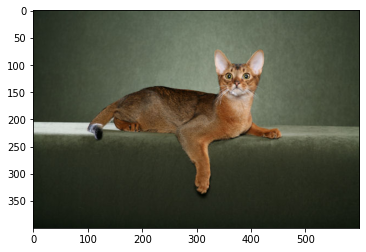

In [0]:
image_file_path = "./pet_dataset/train/abyssinian/Abyssinian_1.jpg"
img = Image.open(image_file_path)
plt.imshow(img)
plt.show()

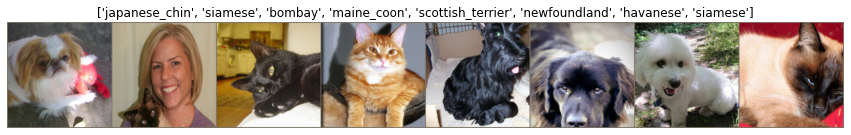

In [0]:


def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(IMG_MEAN)
    std = np.array(IMG_STD)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)  # 最小値0, 最大値1でクリップ
    plt.figure(figsize=(15,5))
    plt.axis('off')
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [0]:
net = models.vgg16(pretrained=True)
#net.eval() # 学習させない


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth


In [0]:
net.classifier[6] = nn.Linear(in_features=4096, out_features=len(class_names))

# 訓練モードに設定
net.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [0]:
criterion = nn.CrossEntropyLoss()
params_to_update_1 = []
params_to_update_2 = []
params_to_update_3 = []

# 学習させる層のパラメータ名を指定
update_param_names_1 = ["features"]
update_param_names_2 = ["classifier.0.weight",
                        "classifier.0.bias", "classifier.3.weight", "classifier.3.bias"]
update_param_names_3 = ["classifier.6.weight", "classifier.6.bias"]

# パラメータごとに各リストに格納する
for name, param in net.named_parameters():
    if update_param_names_1[0] in name:
        param.requires_grad = True
        params_to_update_1.append(param)
        print("params_to_update_1に格納：", name)

    elif name in update_param_names_2:
        param.requires_grad = True
        params_to_update_2.append(param)
        print("params_to_update_2に格納：", name)

    elif name in update_param_names_3:
        param.requires_grad = True
        params_to_update_3.append(param)
        print("params_to_update_3に格納：", name)

    else:
        param.requires_grad = False
        print("勾配計算なし。学習しない：", name)

params_to_update_1に格納： features.0.weight
params_to_update_1に格納： features.0.bias
params_to_update_1に格納： features.2.weight
params_to_update_1に格納： features.2.bias
params_to_update_1に格納： features.5.weight
params_to_update_1に格納： features.5.bias
params_to_update_1に格納： features.7.weight
params_to_update_1に格納： features.7.bias
params_to_update_1に格納： features.10.weight
params_to_update_1に格納： features.10.bias
params_to_update_1に格納： features.12.weight
params_to_update_1に格納： features.12.bias
params_to_update_1に格納： features.14.weight
params_to_update_1に格納： features.14.bias
params_to_update_1に格納： features.17.weight
params_to_update_1に格納： features.17.bias
params_to_update_1に格納： features.19.weight
params_to_update_1に格納： features.19.bias
params_to_update_1に格納： features.21.weight
params_to_update_1に格納： features.21.bias
params_to_update_1に格納： features.24.weight
params_to_update_1に格納： features.24.bias
params_to_update_1に格納： features.26.weight
params_to_update_1に格納： features.26.bias
params_to_update_1に格納： f

In [0]:
optimizer = optim.SGD(params=[
    {'params': params_to_update_1, 'lr': 1e-4},
    {'params': params_to_update_2, 'lr': 5e-4},
    {'params': params_to_update_3, 'lr': 1e-3}
], lr=0.001, momentum=0.9)

In [0]:
%load_ext tensorboard
%tensorboard --logdir ./runs


In [0]:
# Stolen from https://github.com/Bjarten/early-stopping-pytorch
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

In [0]:


def train_model(net, dataloaders_dict, criterion, optimizer, num_epochs):
    writer = SummaryWriter()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    early_stopping = EarlyStopping(patience=3, verbose=True)
    print(device)
    net.to(device)
    # epochのループ
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-------------')

        # epochごとの学習と検証のループ
        for phase in ['train', 'val']:
            if phase == 'train':
                net.train()  # モデルを訓練モードに
            else:
                net.eval()   # モデルを検証モードに

            epoch_loss = 0.0  # epochの損失和
            epoch_corrects = 0  # epochの正解数

            # 未学習時の検証性能を確かめるため、epoch=0の訓練は省略
            if (epoch == 0) and (phase == 'train'):
                continue

            # データローダーからミニバッチを取り出すループ
            for inputs, labels in tqdm(dataloaders_dict[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                # optimizerを初期化
                optimizer.zero_grad()

                # 順伝搬（forward）計算
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = net(inputs)
                    loss = criterion(outputs, labels)  # 損失を計算
                    _, preds = torch.max(outputs, 1)  # ラベルを予測
                    
  
                    # 訓練時はバックプロパゲーション
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                    # イタレーション結果の計算
                    # lossの合計を更新
                    epoch_loss += loss.item() * inputs.size(0)  
                    # 正解数の合計を更新
                    epoch_corrects += torch.sum(preds == labels.data)

            # epochごとのlossと正解率を表示
            epoch_loss = epoch_loss / len(dataloaders_dict[phase].dataset)
            epoch_acc = epoch_corrects.double(
            ) / len(dataloaders_dict[phase].dataset)

            if phase == 'train':
              writer.add_scalar("Loss/train", epoch_loss, epoch)
              writer.add_scalar("Acc/train", epoch_acc, epoch)
            else:
               
              writer.add_scalar("Loss/eval", epoch_loss, epoch)
              writer.add_scalar("Acc/eval", epoch_acc, epoch)
              early_stopping(epoch_loss, net)
              #if early_stopping.early_stop:
              #  break
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

In [0]:
num_epochs=20
train_model(net, dataloaders, criterion, optimizer, num_epochs=num_epochs)

cuda:0


  0%|          | 0/185 [00:00<?, ?it/s]

Epoch 1/20
-------------


100%|██████████| 185/185 [00:11<00:00, 15.64it/s]


Validation loss decreased (inf --> 3.714653).  Saving model ...


  0%|          | 0/739 [00:00<?, ?it/s]

val Loss: 3.7147 Acc: 0.0264
Epoch 2/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.6983 Acc: 0.7908


100%|██████████| 185/185 [00:13<00:00, 13.28it/s]


Validation loss decreased (3.714653 --> 0.327014).  Saving model ...


  0%|          | 0/739 [00:00<?, ?it/s]

val Loss: 0.3270 Acc: 0.8917
Epoch 3/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.3414 Acc: 0.8904


100%|██████████| 185/185 [00:13<00:00, 13.24it/s]


Validation loss decreased (0.327014 --> 0.308956).  Saving model ...


  0%|          | 0/739 [00:00<?, ?it/s]

val Loss: 0.3090 Acc: 0.9046
Epoch 4/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.2764 Acc: 0.9127


100%|██████████| 185/185 [00:13<00:00, 13.40it/s]


Validation loss decreased (0.308956 --> 0.293284).  Saving model ...


  0%|          | 0/739 [00:00<?, ?it/s]

val Loss: 0.2933 Acc: 0.9046
Epoch 5/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.2188 Acc: 0.9278


100%|██████████| 185/185 [00:14<00:00, 12.94it/s]


Validation loss decreased (0.293284 --> 0.235339).  Saving model ...


  0%|          | 0/739 [00:00<?, ?it/s]

val Loss: 0.2353 Acc: 0.9215
Epoch 6/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.1924 Acc: 0.9388


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 3
val Loss: 0.2740 Acc: 0.9208
Epoch 7/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.1635 Acc: 0.9506


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 2 out of 3
val Loss: 0.2925 Acc: 0.9147
Epoch 8/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.1275 Acc: 0.9604


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 3 out of 3
val Loss: 0.2389 Acc: 0.9350
Epoch 9/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.1216 Acc: 0.9584


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 4 out of 3
val Loss: 0.2509 Acc: 0.9344
Epoch 10/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.1099 Acc: 0.9658


100%|██████████| 185/185 [00:16<00:00, 11.15it/s]


Validation loss decreased (0.235339 --> 0.220365).  Saving model ...


  0%|          | 0/739 [00:00<?, ?it/s]

val Loss: 0.2204 Acc: 0.9425
Epoch 11/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0972 Acc: 0.9716


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 1 out of 3
val Loss: 0.2420 Acc: 0.9330
Epoch 12/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0898 Acc: 0.9721


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 2 out of 3
val Loss: 0.2675 Acc: 0.9330
Epoch 13/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0825 Acc: 0.9731


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 3 out of 3
val Loss: 0.2683 Acc: 0.9357
Epoch 14/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0927 Acc: 0.9706


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 4 out of 3
val Loss: 0.2439 Acc: 0.9337
Epoch 15/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0663 Acc: 0.9777


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 5 out of 3
val Loss: 0.2561 Acc: 0.9378
Epoch 16/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0590 Acc: 0.9787


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 6 out of 3
val Loss: 0.2792 Acc: 0.9371
Epoch 17/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0709 Acc: 0.9768


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 7 out of 3
val Loss: 0.3030 Acc: 0.9263
Epoch 18/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0680 Acc: 0.9792


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 8 out of 3
val Loss: 0.3269 Acc: 0.9235
Epoch 19/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0527 Acc: 0.9812


  0%|          | 0/739 [00:00<?, ?it/s]

EarlyStopping counter: 9 out of 3
val Loss: 0.3140 Acc: 0.9269
Epoch 20/20
-------------


  0%|          | 0/185 [00:00<?, ?it/s]

train Loss: 0.0457 Acc: 0.9873


100%|██████████| 185/185 [00:15<00:00, 12.17it/s]

EarlyStopping counter: 10 out of 3
val Loss: 0.3291 Acc: 0.9269
